## K-Means 클러스터링

#### [⏩ 영상 바로가기](#video-00:00:00-00:28:17)

2차원으로 줄여 시각화한 와인 데이터를 이용해 어떤 와인이 비슷한지 알아내고, 비슷한 와인을 묶는 알고리즘을 작성해보겠습니다.

클러스터링, 또는 클러스터 분석은 주어진 개체에서 비슷한 개체를 선별하고 묶는(grouping) 작업을 의미합니다. 또한, 대표값을 추출하여 각 클러스터를 대표하는 개체를 찾아낼 수 있습니다. 

예로, 여러 종의 생물이 나영되어 있을 때, 각 종에 대한 세부 정보를 이용해 동물 클러스터와 식물 클러스터를 자동으로 추출해 낼 수 있습니다.

K-Means 클러스터링은 주어진 데이터를 K개의 클러스터로 묶는 알고리즘으로, 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작합니다. 알고리즘은 어떠한 선행 학습 없이 자동으로 클러스터를 분류하고 개체들의 묶음을 추출해 냅니다. 

K의 개수의 조정하면 클러스터의 일반도를 조정할 수 있습니다. 생물 데이터에서, K=2 인 경우에는 동물과 식물 클러스터가 나올 가능성이 높습니다. 

K가 매우 크다면, 동물/식물 내의 세부 분류, 강/목/속/종 등의 분류가 나올 수 있습니다. K-means는 완전한 자율 알고리즘이기 때문에 K를 제외한 다른 입력값이 없으며, random 값을 사용하므로 여러 번을 반복 실행하여 평균 성능을 측정하는 것이 일반적입니다.

## 실습

강의를 듣고 천천히 따라해보세요

1. 주성분 분석 결과를 확인합니다. [PCA 차원 축소](https://academy.elice.io/courses/299/lectures/2279/materials/1/)에서 구현한 코드를 사용합니다.
1. K-Means 알고리즘을 구현합니다. K-means 알고리즘은 다음 값을 입력 받습니다. 
  * `num_clusters` - 클러스터의 개수.
  * `initial_centroid_indices` - 초기 중심점. `initial_centroid_indices`가 `[0, 1, 2]`일때 `initial_centroids` 는 첫번째, 두번째, 그리고 세번째 데이터 포인트입니다.
1. K-Means를 실행한 후 각 데이터 포인트 에 대한 클러스터 결과(label)를 리턴합니다. label은 0부터 시작합니다.

[[-0.68388966 -0.37373167]
 [ 0.098774    0.17226483]
 [-0.04523645 -0.32815231]]
[[-0.55918612 -0.24859536]
 [ 0.15210429  0.22072586]
 [ 0.29720736 -0.3136785 ]]
[[-0.49459312 -0.17365971]
 [ 0.04101307  0.34262542]
 [ 0.60306452 -0.23956367]]
[[-0.48503975 -0.17742871]
 [ 0.01701227  0.36612572]
 [ 0.59750634 -0.21895939]]
[[-0.48503975 -0.17742871]
 [ 0.01701227  0.36612572]
 [ 0.59750634 -0.21895939]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


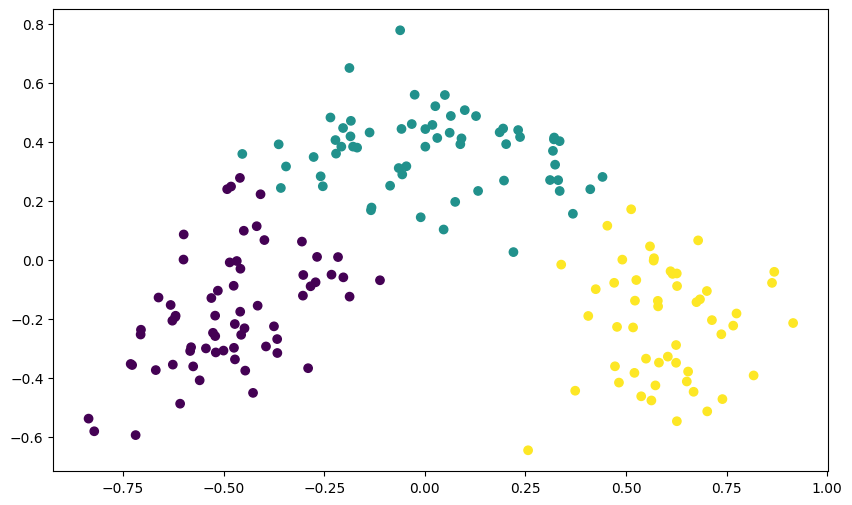

<Figure size 640x480 with 0 Axes>

In [31]:
import sklearn.decomposition
import sklearn.cluster
import matplotlib.pyplot as plt
import numpy as np
# import elice_utils

def main():
    X, attributes = input_data()
    X = normalize(X)
    pca, pca_array = run_PCA(X, 2)
    labels = kmeans(pca_array, 3, [0, 1, 2])
    print(labels)
    visualize_2d_wine(pca_array, labels)

def input_data():
    X = []
    attributes = []
    
    with open('data_wine.csv') as fp:
        for line in fp:
            X.append([float(x) for x in line.strip().split(',')])
    
    with open('attributes.txt') as fp:
        attributes = [x.strip() for x in fp.readlines()]

    return np.array(X), attributes

def run_PCA(X, num_components):
    pca = sklearn.decomposition.PCA(n_components=num_components)
    pca.fit(X)
    pca_array = pca.transform(X)

    return pca, pca_array

def kmeans(X, num_clusters, initial_centroid_indices):
    import time
    N = len(X)
    centroids = X[initial_centroid_indices]
    labels = np.zeros(N)
    
    while True:
        '''
        Step 1. 각 데이터 포인트 i 에 대해 가장 가까운
        중심점을 찾고, 그 중심점에 해당하는 클러스터를 할당하여
        labels[i]에 넣습니다.
        가까운 중심점을 찾을 때는, 유클리드 거리를 사용합니다.
        미리 정의된 distance 함수를 사용합니다.
        '''
        is_changed = False
        for i in range(N):
            distances = []
            for k in range(num_clusters):
                dist = distance(X[i], centroids[k])
                distances.append(dist)
#             print(distances)
            if labels[i] != np.argmin(distances):
                is_changed = True
            labels[i] = np.argmin(distances) # argmin, argmax: array 요소들 중 최대값 또는 최소값의 index를 반환하는 함수
#         print(labels)
        
        '''
        Step 2. 할당된 클러스터를 기반으로 새로운 중심점을 계산합니다.
        중심점은 클러스터 내 데이터 포인트들의 위치의 *산술 평균*
        으로 합니다.
        '''
        for k in range(num_clusters):
            x = X[labels == k][:, 0]
            y = X[labels == k][:, 1]
            centroids[k] = [np.mean(x), np.mean(y)]
#             print(x, '\n')
#             print(y, '\n')
        print(centroids)
        '''
        Step 3. 만약 클러스터의 할당이 바뀌지 않았다면 알고리즘을 끝냅니다.
        아니라면 다시 반복합니다.
        '''
        if not is_changed:
            break
    return labels

def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
    
def normalize(X):
    for dim in range(len(X[0])):
        X[:, dim] -= np.min(X[:, dim])
        X[:, dim] /= np.max(X[:, dim])
    return X

'''
이전에 더해, 각각의 데이터 포인트에 색을 입히는 과정도 진행합니다.
'''

def visualize_2d_wine(X, labels):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.show()
    plt.savefig("image.svg", format="svg")
#     elice_utils.send_image("image.svg")

if __name__ == '__main__':
    main()

In [15]:
X, attributes = input_data()
X = normalize(X)
pca, pca_array = run_PCA(X, 2)

In [16]:
X

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])